In [1]:
from ellipse import LsqEllipse
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import cv2
import math


In [2]:
def eye_tracking_analysis(dlc_video_analysis_csv, bodyparts_list,):
    """
    :param dlc_video_analysis_csv: the csv output of a dlc analysis of one video
    :param bodyparts_list: a list of bodyparts as described in the dlc csv (i.e ['Pupil_12', 'Pupil_6'....])
    :returns ellipse_df: a DataFrame of ellipses parameters (center, width, height, phi, size) for each video frame

    """

    data = pd.read_csv(dlc_video_analysis_csv)
    ellipses = []
    for row in range(1, len(data)-1):
        x_values = np.array(list([float(data['Pupil_12'][row]),float(data['Pupil_1'][row]),float(data['Pupil_3'][row]),float(data['Pupil_4'][row]),float(data['Pupil_6'][row]),float(data['Pupil_8'][row]),float(data['Pupil_10'][row])]))
        y_values = np.array(list([float(data['Pupil_12.1'][row]),float(data['Pupil_1.1'][row]),float(data['Pupil_3.1'][row]),float(data['Pupil_4.1'][row]),float(data['Pupil_6.1'][row]),float(data['Pupil_8.1'][row]),float(data['Pupil_10.1'][row])]))
        X = np.c_[x_values,y_values]

        el = LsqEllipse().fit(X)
        center, width, height, phi = el.as_parameters()
        ellipses.append([center,width,height,phi])
        if row % 50 == 0:
           print(f'just finished with {row} out of {len(data)-1}', end='\r',flush=True)
    ellipse_df = pd.DataFrame(columns = ['center', 'width', 'height', 'phi'], data = ellipses)
    a = np.array(ellipse_df['height'][:])
    b = np.array(ellipse_df['width'][:])
    ellipse_size_per_frame = a*b*math.pi
    ellipse_size_per_frame
    ellipse_df['ellipse_size'] = ellipse_size_per_frame
    return ellipse_df

In [3]:
data = pd.read_csv(r'D:\DeepLabCut\Projects\AzulaTrial_30_12_2020-Nimrod-2021-01-03\videos\AzulaTrial5_30_12LDLC_resnet_50_AzulaTrial_30_12_2020Jan3shuffle1_250000.csv', header=1)


c:\users\marks3\pycharmprojects\pythonproject3\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data

,bodyparts,Pupil_12,Pupil_12.1,Pupil_12.2,Pupil_6,Pupil_6.1,Pupil_6.2,Pupil_3,Pupil_3.1,Pupil_3.2,...,Pupil_4.2,Pupil_8,Pupil_8.1,Pupil_8.2,Pupil_10,Pupil_10.1,Pupil_10.2,Pupil,Pupil.1,Pupil.2
0,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
1,0,297.6988525390625,152.1055145263672,0.9718207120895386,319.39215087890625,84.32563781738281,0.9997292757034302,271.16143798828125,107.15779876708984,0.9998931288719177,...,0.9996060132980347,340.6585388183594,104.07011413574219,0.9997392892837524,328.1934814453125,150.9032745361328,0.9991286993026733,332.12152099609375,150.1953887939453,0.014568626880645752
2,1,298.572998046875,152.77096557617188,0.9754401445388794,319.3204650878906,84.31270599365234,0.9997414946556091,271.1758117675781,107.18115234375,0.9998959898948669,...,0.9995782375335693,340.7232971191406,104.0181655883789,0.9997158646583557,328.3109436035156,150.74014282226562,0.9991285800933838,332.15240478515625,150.0635223388672,0.014836877584457397
3,2,297.4208984375,151.7348175048828,0.9575599431991577,319.4442443847656,84.4003677368164,0.999721884727478,271.26483154296875,107.23966217041016,0.9999033808708191,...,0.9995859861373901,340.7562255859375,104.17092895507812,0.9997155666351318,327.87744140625,151.1179962158203,0.9991304874420166,332.06744384765625,150.46485900878906,0.013055920600891113
4,3,297.7745361328125,152.03451538085938,0.9591055512428284,319.4338684082031,84.31131744384766,0.9997204542160034,271.1988220214844,107.25365447998047,0.9999018311500549,...,0.9995707273483276,340.8419189453125,104.13966369628906,0.9997372627258301,327.817138671875,151.19033813476562,0.9992165565490723,331.9332275390625,150.52223205566406,0.012817800045013428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55878,55877,296.293,157.505,0.990302,306.85,82.9345,0.999692,262.139,115.587,0.999917,...,0.999921,333.083,98.2942,0.999669,328.219,148.753,0.999478,331.174,148.294,0.0067938
55879,55878,296.386,157.481,0.989972,306.607,82.9112,0.99971,262.11,115.709,0.999915,...,0.999923,333.02,98.1198,0.999668,328.256,148.776,0.999495,331.184,148.216,0.00681111
55880,55879,296.366,157.352,0.989779,306.627,82.9653,0.999712,262.115,115.587,0.999914,...,0.99992,333.031,98.0659,0.999681,328.235,148.795,0.999489,331.184,148.244,0.00663638
55881,55880,296.321,157.516,0.989933,306.746,82.8543,0.999718,262.099,115.614,0.999916,...,0.999922,333.06,98.1816,0.999681,328.169,148.819,0.999488,331.22,148.353,0.00697365


In [5]:
ellipses = []
bad_rows = []

for row in range(1, len(data)-1):
    x_values = np.array(list([float(data['Pupil_12'][row]),float(data['Pupil_1'][row]),float(data['Pupil_3'][row]),float(data['Pupil_4'][row]),float(data['Pupil_6'][row]),float(data['Pupil_8'][row]),float(data['Pupil_10'][row])]))
    y_values = np.array(list([float(data['Pupil_12.1'][row]),float(data['Pupil_1.1'][row]),float(data['Pupil_3.1'][row]),float(data['Pupil_4.1'][row]),float(data['Pupil_6.1'][row]),float(data['Pupil_8.1'][row]),float(data['Pupil_10.1'][row])]))
    X = np.c_[x_values,y_values]
    el = LsqEllipse().fit(X)
    if len(el.coefficients) == 0:
        bad_rows.append(row)
        ellipses.append([[0,0],0,0,0])
        continue
    center, width, height, phi = el.as_parameters()
    ellipses.append([center,width,height,phi])
    if row % 50 == 0:
        print(f'just finished with {row} out of {len(data)-1}', end='\r',flush=True)

In [6]:
ellipse_df = pd.DataFrame(columns = ['center', 'width', 'height', 'phi'], data = ellipses, dtype= float)

In [7]:
a = np.array(ellipse_df['height'][:])
b = np.array(ellipse_df['width'][:])
ellipse_size_per_frame = a*b*math.pi
ellipse_df['ellipse_size'] = ellipse_size_per_frame

In [8]:
ellipse_df.to_csv(r'D:\AzulaTrials_30_12_2020\Trial3_VisualStim_Landscapes\Trial_3_R\ellipsefit.csv')

In [9]:
def ellipse_visual_validation(vid_path,ellipse_df):
    cap = cv2.VideoCapture(vid_path)
    flag = 0
    i = 0
    while flag == 0:
        ret, frame = cap.read()
        if not ret:
            break


#        grey = cv2.ellipse(grey, (int(ellipse_df['center'][i][0]), int(ellipse_df['center'][i][1])), (int(ellipse_df['width'][i]*2), int(ellipse_df['height'][i]*2)), int(ellipse_df['phi'][i]))
        if ellipse_df.iloc[i][0] == [0,0]:
            i+=1
            continue
        frame = cv2.ellipse(frame, (int(ellipse_df['center'][i][0]), int(ellipse_df['center'][i][1])),(int(ellipse_df['width'][i]), int(ellipse_df['height'][i])) ,int(ellipse_df['phi'][i]),0,360,(0, 255, 255) ,1)
        cv2.imshow('frame',frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        i+=1
    cap.release()
    cv2.destroyAllWindows()

In [91]:
ellipse_df.iloc[333][0]


[311.8380837642648, 117.34685713152402]

In [10]:
#int(ellipse_df['center'][7000][0])
ellipse_visual_validation(r'D:\AzulaTrials_30_12_2020\Trial3_VisualStim_Landscapes\Trial_3_L\AzulaTrial5_30_12.mp4', ellipse_df)

In [21]:
cap = cv2.VideoCapture(r'D:\AzulaTrials_30_12_2020\Trial3_VisualStim_Landscapes\Trial_3_R\AzulaTrial5_30_12.mp4')
cap.release()
cv2.destroyAllWindows()

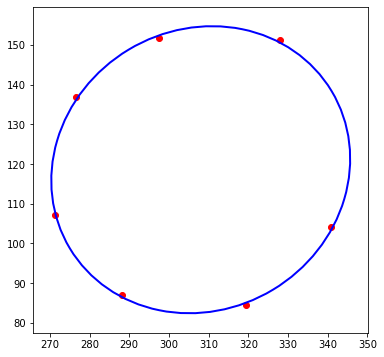

In [81]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.plot(x_values, y_values, 'ro', zorder=1)
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
)
ax.add_patch(ellipse)

C:\Users\MarkS3\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


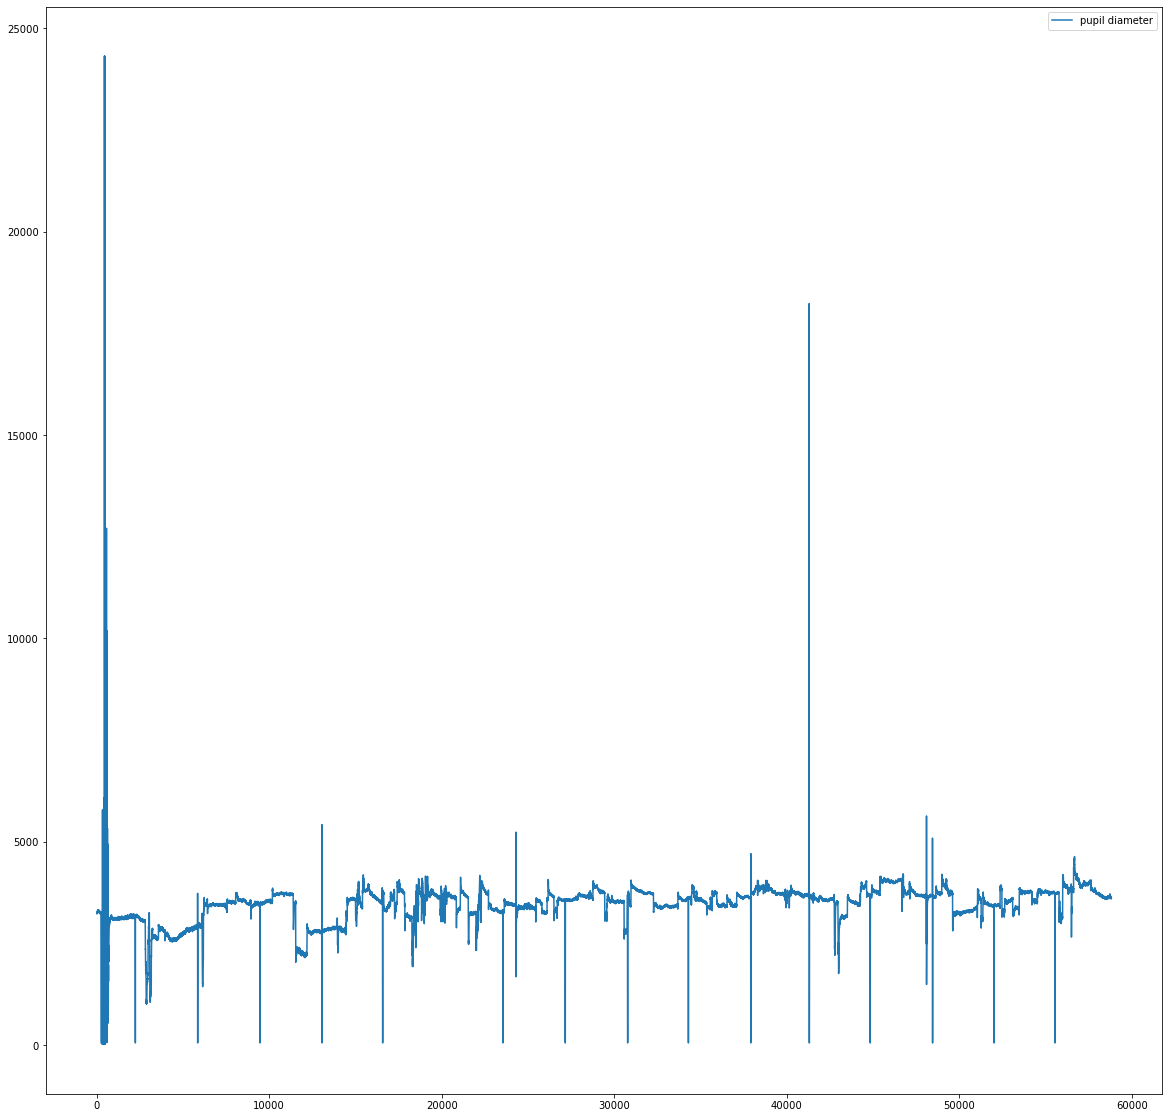

In [16]:
a = np.array(ellipse_df['height'][:])
b = np.array(ellipse_df['width'][:])
ellipse_size_per_frame = a*b*math.pi
ellipse_size_per_frame

plt.figure(figsize=(20,20))
_=plt.plot(range(1,len(data)-1),ellipse_size_per_frame, label='pupil diameter')
plt.legend()

In [64]:

a = np.array(ellipse_df['height'][:])
b = np.array(ellipse_df['width'][:])
print(a)
print(b)
ellipse_size_per_frame = a*b*math.pi
ellipse_size_per_frame

[30.26169949+0.j 30.24778303+0.j 30.29690284+0.j ... 31.72271692+0.j
 31.50179987+0.j 31.639493  +0.j]
[34.02279278+0.j 34.14664557+0.j 33.94125929+0.j ... 36.22020803+0.j
 36.43262361+0.j 36.43293201+0.j]


array([3234.5446239 +0.j, 3244.8264143 +0.j, 3230.5469594 +0.j, ...,
       3609.70065937+0.j, 3605.58458062+0.j, 3621.37510476+0.j])

In [78]:
ellipse_df[:]

,center,width,height,phi,ellipse_size
0,"[219.88127882252368, 173.80384074831238]",34.022793,30.261699,-0.558652,3234.544624
1,"[219.85441165061246, 173.7442911923951]",34.146646,30.247783,-0.553862,3244.826414
2,"[219.85325646090837, 173.83626179373107]",33.941259,30.296903,-0.545024,3230.546959
3,"[219.8763017333656, 173.73268930346086]",34.014992,30.296904,-0.553559,3237.565028
4,"[219.7822889884564, 173.8070901976251]",34.209157,30.351937,-0.555317,3261.960169
...,...,...,...,...,...
58803,"[216.58700835409783, 170.81029596485763]",36.264530,31.587508,-0.702222,3598.713576
58804,"[216.6524781716584, 170.7699433067881]",36.171273,31.657347,-0.689578,3597.395400
58805,"[216.53287230483508, 170.79016292503107]",36.220208,31.722717,-0.686873,3609.700659
58806,"[216.70507918336716, 170.7373805433935]",36.432624,31.501800,-0.694506,3605.584581
